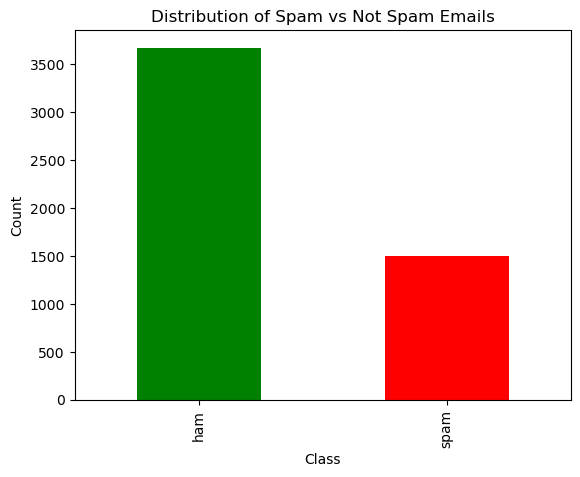

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report


In [16]:
df = pd.read_csv('/Users/mehakklunkar/Downloads/ML Study Material/spam_ham_dataset.csv')
df.head()

In [ ]:
df.shape

In [ ]:
df.describe

In [ ]:
df['label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Spam vs Not Spam Emails')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [2]:
X = df['text']
y = df['label']
y = y.map({'spam': 1, 'ham': 0})
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = MultinomialNB(alpha=1.0)
nb.fit(X_train, y_train)

MultinomialNB()

In [3]:
train_pre=nb.predict(X_train)
train_acc=accuracy_score(train_pre,y_train)
print('Training Accuracy by Naive Bayes:',train_acc)

Training Accuracy by Naive Bayes: 0.9867021276595744


In [4]:
tes_pre=nb.predict(X_test)
tes_acc=accuracy_score(tes_pre,y_test)
print('Testing Accuracy by Naive Bayes:',tes_acc)

Testing Accuracy by Naive Bayes: 0.9758454106280193


In [5]:
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       742
           1       0.95      0.96      0.96       293

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



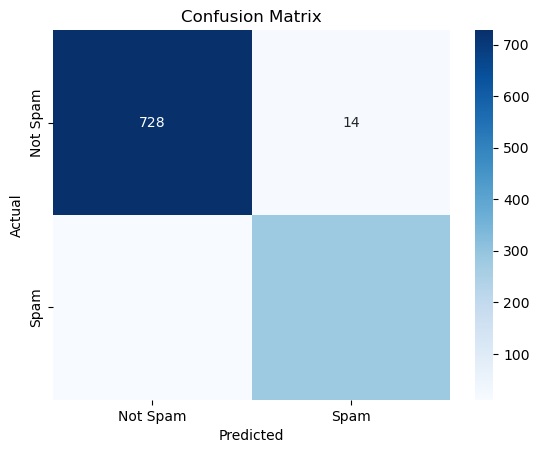

In [6]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

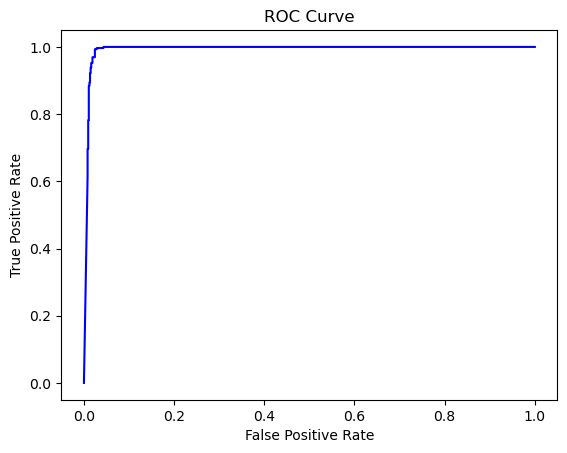

AUC-ROC Score: 0.9928336844429316


In [8]:
y_prob = nb.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, color='blue')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

auc_roc = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC Score: {auc_roc}')


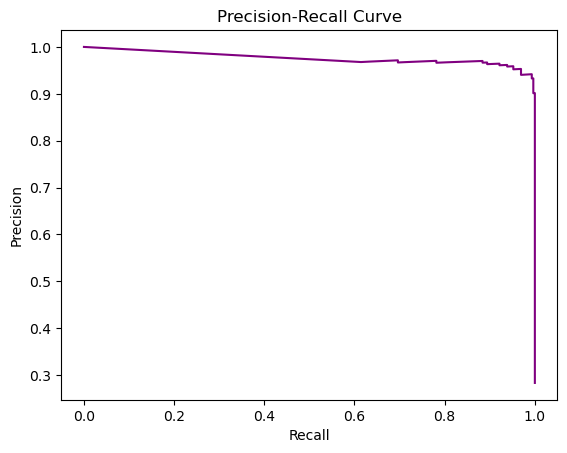

In [9]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

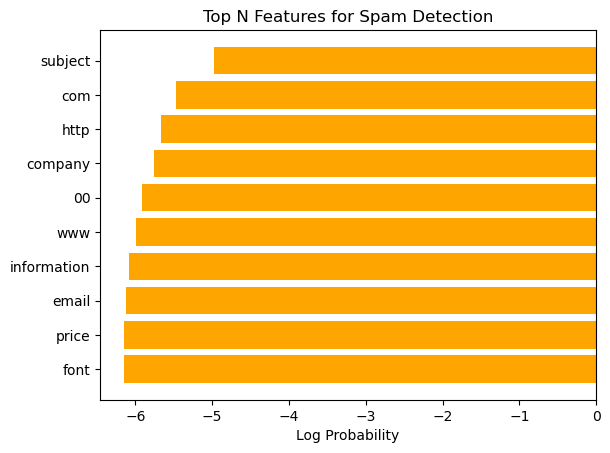

In [10]:
feature_names = np.array(vectorizer.get_feature_names_out())
feature_log_prob = nb.feature_log_prob_[1]  

N = 10
top_N_features = np.argsort(feature_log_prob)[-N:]

plt.barh(feature_names[top_N_features], feature_log_prob[top_N_features], color='orange')
plt.title('Top N Features for Spam Detection')
plt.xlabel('Log Probability')
plt.show()

In [13]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.9758454106280193
Precision: 0.9527027027027027
Recall: 0.962457337883959
F1-score: 0.9575551782682513


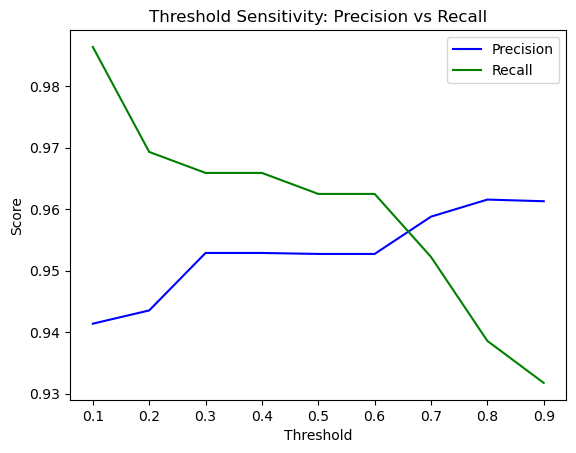

In [15]:
thresholds = np.arange(0.1, 1.0, 0.1)
precision_vals = []
recall_vals = []

for t in thresholds:
    y_pred_thresh = (y_prob >= t).astype(int)
    precision_vals.append(precision_score(y_test, y_pred_thresh))
    recall_vals.append(recall_score(y_test, y_pred_thresh))

plt.plot(thresholds, precision_vals, label='Precision', color='blue')
plt.plot(thresholds, recall_vals, label='Recall', color='green')
plt.title('Threshold Sensitivity: Precision vs Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

**Inference:**<br>
*-Data Distribution: A bar chart shows the proportion of 'Spam' versus 'Not Spam' emails, indicating class balance.*<br>
*-Confusion Matrix: A heatmap displays the true positives, true negatives, false positives, and false negatives for the Naive Bayes model.*<br>
*-ROC and Precision-Recall Curves: ROC curves illustrate the trade-off between true positive and false positive rates, while Precision-Recall curves show the performance across different thresholds.*